<a href="https://colab.research.google.com/github/denis-aenasoaei/Licenta-LipReading/blob/main/Lip-Reading%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# Libraries and connections
!pip install tensorflow
!pip install dlib
!pip install opencv-python




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import cv2
import sys
from google.colab.patches import cv2_imshow
import numpy as np
import dlib
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import cv2
import sys
from google.colab.patches import cv2_imshow

(major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')

vc = cv2.VideoCapture('/content/drive/MyDrive/datasets/low/s1/bbal7s.mpg')
# Display the total number of frames in video
# print(vc.get(cv2.CAP_PROP_FRAME_COUNT))


# Display all frames in video

# if vc.isOpened():
#     rval , frame = vc.read()
# else:
#     rval = False

# while 1:
#     rval, frame = vc.read()
#     if not rval:
#       break
#     cv2_imshow(frame)
#     c = c + 1
# vc.release()



75.0


In [5]:
def convert_and_trim_bb(image, rect):
	startX = rect.left()
	startY = rect.top()
	endX = rect.right()
	endY = rect.bottom()
	startX = max(0, startX)
	startY = max(0, startY)
	endX = min(endX, image.shape[1])
	endY = min(endY, image.shape[0])
	return (startX, endX, startY, endY)
 
def shape_to_np(shape, dtype="int"):
  # initialize the list of (x, y)-coordinates
  coords = np.zeros((68, 2), dtype=dtype)
  # loop over the 68 facial landmarks and convert them
  # to a 2-tuple of (x, y)-coordinates
  for i in range(0, 68):
    coords[i] = (shape.part(i).x, shape.part(i).y)
  # return the list of (x, y)-coordinates
  return coords

def distanceBetweenMouth(c):
    m_60,m_61,m_62,m_63,m_64,m_65,m_66,m_67 = 0,0,0,0,0,0,0,0
    m_60 = c[59]
    m_61 = c[60]
    m_62 = c[61]
    m_63 = c[62]
    m_64 = c[63]
    m_65 = c[64]
    m_66 = c[65]
    m_67 = c[66]
    x1 = np.linalg.norm(m_61-m_67)
    x2 = np.linalg.norm(m_62 - m_66)
    x3 = np.linalg.norm(m_63-m_65)   
    return ((x1+x2+x3)/3)



def mouthPoints():
    return [60,61,62,63,64,65,66,67]

 

360.0 288.0


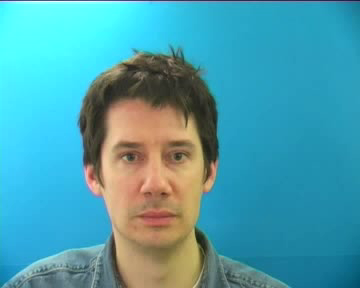

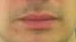

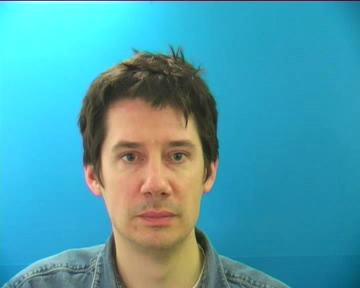

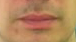

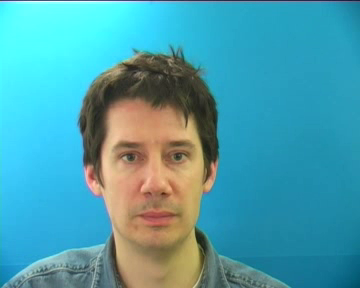

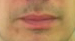

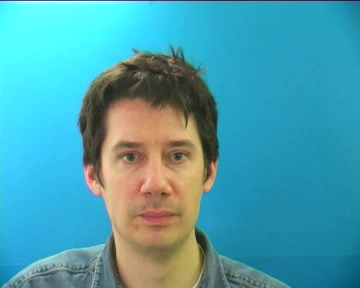

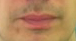

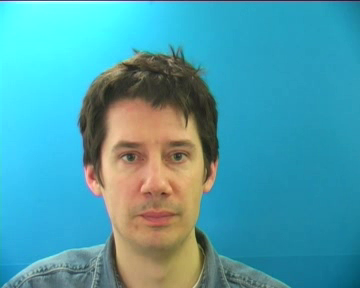

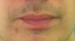

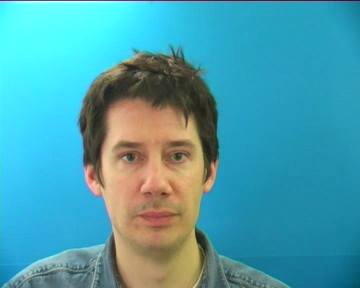

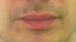

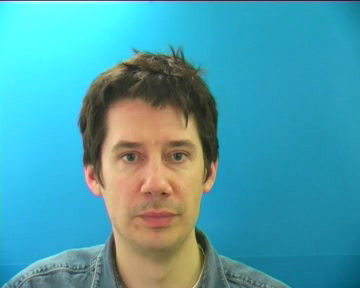

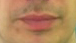

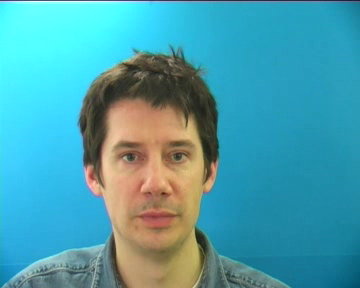

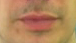

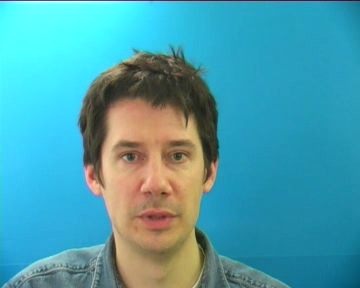

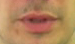

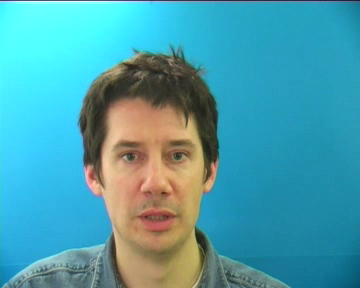

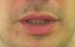

In [ ]:
predictor_path = "/content/drive/MyDrive/shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector() #Face detector
predictor = dlib.shape_predictor(predictor_path) 

vc = cv2.VideoCapture('/content/drive/MyDrive/datasets/low/s1/bbal7s.mpg')

PAD_PERCENT_OF_FRAME = 0.05

pad_width = int(vc.get(cv2.CAP_PROP_FRAME_WIDTH) * PAD_PERCENT_OF_FRAME)
pad_height = int(vc.get(cv2.CAP_PROP_FRAME_HEIGHT) * PAD_PERCENT_OF_FRAME)
print(vc.get(cv2.CAP_PROP_FRAME_WIDTH), vc.get(cv2.CAP_PROP_FRAME_HEIGHT))
# Display all frames in video

if vc.isOpened():
  while 1:
      rval, frame = vc.read()
      if not rval:
        break
      cv2_imshow(frame)
      gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
      # detect faces in the grayscale image
      rects = detector(gray, 1)
      shape = predictor(gray, rects[0])
      xmouthpoints = [shape.part(x).x for x in range(48,67)]
      ymouthpoints = [shape.part(x).y for x in range(48,67)]
      maxx = max(xmouthpoints)
      minx = min(xmouthpoints)
      maxy = max(ymouthpoints)
      miny = min(ymouthpoints) 

      # to show the mouth properly pad both sides
      
      crop_image = frame[miny-pad_height:maxy+pad_height,minx-pad_width:maxx+pad_width]
      cv2_imshow(crop_image)
      input()
vc.release()